<a href="https://colab.research.google.com/github/pastelpargoal/NO2/blob/main/final_project_pargoal_kei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
from plotnine import *
import plotnine
import numpy as np

import geopandas as gpd
from shapely.geometry import Polygon

In [212]:
# upload insurance data
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/Health_Insurance_Coverage_-3781299888772232728.csv"
insurance_df = pd.read_csv(url)
insurance_df.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
0,2017,9001,County,Fairfield,No,18 or Under,14010.0,1043.2,Count,13216
1,2017,9001,County,Fairfield,No,18 to 64,41587.0,1416.7,Count,13217
2,2017,9001,County,Fairfield,No,19 to 25,13582.0,877.2,Count,13218
3,2017,9001,County,Fairfield,No,26 to 34,19412.0,925.6,Count,13219
4,2017,9001,County,Fairfield,No,65 and Over,2022.0,372.0,Count,13220


In [213]:
# just look at for 18 or under
insurance_df_under18 = insurance_df.loc[insurance_df["Age"] == "18 or Under"]
insurance_df_under18.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
0,2017,9001,County,Fairfield,No,18 or Under,14010.0,1043.2,Count,13216
5,2017,9001,County,Fairfield,Total,18 or Under,234166.0,1221.8,Count,13221
10,2017,9001,County,Fairfield,Yes,18 or Under,220156.0,1512.1,Count,13226
15,2017,9003,County,Hartford,No,18 or Under,5473.0,628.7,Count,13774
20,2017,9003,County,Hartford,Total,18 or Under,204895.0,1059.6,Count,13779


In [214]:
# subset to people without coverage
insurance_df_under18_no_coverage = insurance_df_under18.loc[insurance_df_under18["Coverage"] == "No"]
insurance_df_under18_no_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
0,2017,9001,County,Fairfield,No,18 or Under,14010.0,1043.2,Count,13216
15,2017,9003,County,Hartford,No,18 or Under,5473.0,628.7,Count,13774
30,2017,9005,County,Litchfield,No,18 or Under,1270.0,293.8,Count,14272
45,2017,9007,County,Middlesex,No,18 or Under,533.0,155.2,Count,14584
60,2017,9009,County,New Haven,No,18 or Under,5497.0,694.7,Count,15044


In [215]:
# see just new haven data
insurance_df_under18_no_coverage_new_haven = insurance_df_under18_no_coverage.loc[insurance_df_under18_no_coverage["Geography Name"] == "New Haven"]
insurance_df_under18_no_coverage_new_haven.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
60,2017,9009,County,New Haven,No,18 or Under,5497.0,694.7,Count,15044
185,2018,9009,County,New Haven,No,18 or Under,4495.0,569.5,Count,17591
300,2019,9009,County,New Haven,No,18 or Under,4210.0,595.4,Count,20206
420,2020,9009,County,New Haven,No,18 or Under,4839.0,761.3,Count,22831
525,2021,9009,County,New Haven,No,18 or Under,4677.0,758.7,Count,25252


In [216]:
insurance_df_under18_no_coverage_new_haven.value_counts()

Year  GeoID  Geography Type  Geography Name  Coverage  Age          Value   Margin of Error  Measure  ObjectId
2017  9009   County          New Haven       No        18 or Under  2.9     0.4              Percent  46912       1
                                                                    5497.0  694.7            Count    15044       1
2018  9009   County          New Haven       No        18 or Under  2.4     0.3              Percent  49396       1
                                                                    4495.0  569.5            Count    17591       1
2019  9009   County          New Haven       No        18 or Under  2.2     0.3              Percent  52207       1
                                                                    4210.0  595.4            Count    20206       1
2020  9009   County          New Haven       No        18 or Under  2.6     0.4              Percent  54824       1
                                                                    4839.0  761.3            Count    22831       1
2021  9009   County          New Haven       No        18 or Under  2.5     0.4              Percent  57471       1
                                                                    4677.0  758.7            Count    25252       1
Name: count, dtype: int64

In [217]:
# Keep rows only where Measure is Percent
insurance_df_under18_no_coverage = insurance_df_under18_no_coverage.loc[insurance_df_under18_no_coverage["Measure"] == "Percent"]
insurance_df_under18_no_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
600,2017,9001,County,Fairfield,No,18 or Under,6.0,0.4,Percent,45562
625,2017,9003,County,Hartford,No,18 or Under,2.7,0.3,Percent,45972
640,2017,9005,County,Litchfield,No,18 or Under,3.4,0.8,Percent,46166
645,2017,9007,County,Middlesex,No,18 or Under,1.6,0.5,Percent,46443
661,2017,9009,County,New Haven,No,18 or Under,2.9,0.4,Percent,46912


In [218]:
# change Value column name to percent uninsured
insurance_df_under18_no_coverage = insurance_df_under18_no_coverage.rename(columns={"Value": "Percent Uninsured"})
insurance_df_under18_no_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Percent Uninsured,Margin of Error,Measure,ObjectId
600,2017,9001,County,Fairfield,No,18 or Under,6.0,0.4,Percent,45562
625,2017,9003,County,Hartford,No,18 or Under,2.7,0.3,Percent,45972
640,2017,9005,County,Litchfield,No,18 or Under,3.4,0.8,Percent,46166
645,2017,9007,County,Middlesex,No,18 or Under,1.6,0.5,Percent,46443
661,2017,9009,County,New Haven,No,18 or Under,2.9,0.4,Percent,46912


In [219]:
# change Greography Name column name to county
insurance_df_under18_no_coverage = insurance_df_under18_no_coverage.rename(columns={"Geography Name": "County"})
insurance_df_under18_no_coverage.head()

,Year,GeoID,Geography Type,County,Coverage,Age,Percent Uninsured,Margin of Error,Measure,ObjectId
600,2017,9001,County,Fairfield,No,18 or Under,6.0,0.4,Percent,45562
625,2017,9003,County,Hartford,No,18 or Under,2.7,0.3,Percent,45972
640,2017,9005,County,Litchfield,No,18 or Under,3.4,0.8,Percent,46166
645,2017,9007,County,Middlesex,No,18 or Under,1.6,0.5,Percent,46443
661,2017,9009,County,New Haven,No,18 or Under,2.9,0.4,Percent,46912


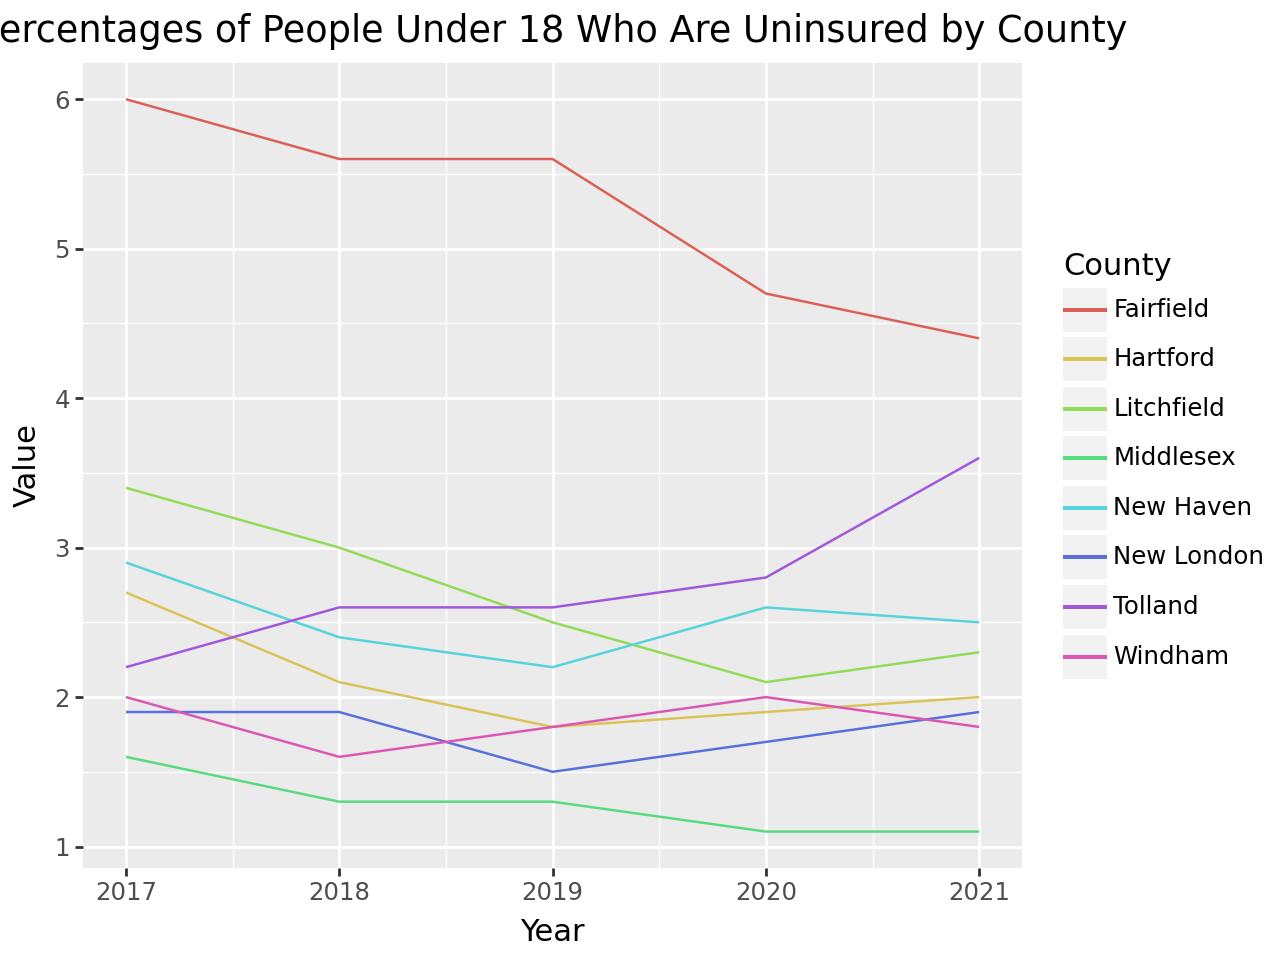

In [220]:
# line plot with x axis as year, y axis as Value, for all geography names

(
    ggplot(insurance_df_under18_no_coverage, aes(x='Year', y='Percent Uninsured', color='County'))
    + geom_line()
    + labs(title='Percentages of People Under 18 Who Are Uninsured by County', x='Year', y='Value')
)


In [221]:
# make plot of percentage of people who are insured

insurance_df_under18_with_coverage = insurance_df_under18.loc[insurance_df_under18["Coverage"] == "Yes"]
insurance_df_under18_with_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
10,2017,9001,County,Fairfield,Yes,18 or Under,220156.0,1512.1,Count,13226
25,2017,9003,County,Hartford,Yes,18 or Under,199422.0,1244.9,Count,13784
40,2017,9005,County,Litchfield,Yes,18 or Under,35998.0,524.3,Count,14323
55,2017,9007,County,Middlesex,Yes,18 or Under,32440.0,487.7,Count,14594
70,2017,9009,County,New Haven,Yes,18 or Under,186646.0,1240.3,Count,15093


In [222]:
# subset to just where measure is percent
insurance_df_under18_with_coverage = insurance_df_under18_with_coverage.loc[insurance_df_under18_with_coverage["Measure"] == "Percent"]
insurance_df_under18_with_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Value,Margin of Error,Measure,ObjectId
602,2017,9001,County,Fairfield,Yes,18 or Under,94.0,0.4,Percent,45588
627,2017,9003,County,Hartford,Yes,18 or Under,97.3,0.3,Percent,45974
642,2017,9005,County,Litchfield,Yes,18 or Under,96.6,0.6,Percent,46168
647,2017,9007,County,Middlesex,Yes,18 or Under,98.4,0.5,Percent,46450
663,2017,9009,County,New Haven,Yes,18 or Under,97.1,0.3,Percent,46914


In [223]:
# change value name to percentage
insurance_df_under18_with_coverage = insurance_df_under18_with_coverage.rename(columns={"Value": "Percent Insured"})
insurance_df_under18_with_coverage.head()

,Year,GeoID,Geography Type,Geography Name,Coverage,Age,Percent Insured,Margin of Error,Measure,ObjectId
602,2017,9001,County,Fairfield,Yes,18 or Under,94.0,0.4,Percent,45588
627,2017,9003,County,Hartford,Yes,18 or Under,97.3,0.3,Percent,45974
642,2017,9005,County,Litchfield,Yes,18 or Under,96.6,0.6,Percent,46168
647,2017,9007,County,Middlesex,Yes,18 or Under,98.4,0.5,Percent,46450
663,2017,9009,County,New Haven,Yes,18 or Under,97.1,0.3,Percent,46914


In [224]:
# change geography name to county
insurance_df_under18_with_coverage = insurance_df_under18_with_coverage.rename(columns={"Geography Name": "County"})
insurance_df_under18_with_coverage.head()

,Year,GeoID,Geography Type,County,Coverage,Age,Percent Insured,Margin of Error,Measure,ObjectId
602,2017,9001,County,Fairfield,Yes,18 or Under,94.0,0.4,Percent,45588
627,2017,9003,County,Hartford,Yes,18 or Under,97.3,0.3,Percent,45974
642,2017,9005,County,Litchfield,Yes,18 or Under,96.6,0.6,Percent,46168
647,2017,9007,County,Middlesex,Yes,18 or Under,98.4,0.5,Percent,46450
663,2017,9009,County,New Haven,Yes,18 or Under,97.1,0.3,Percent,46914


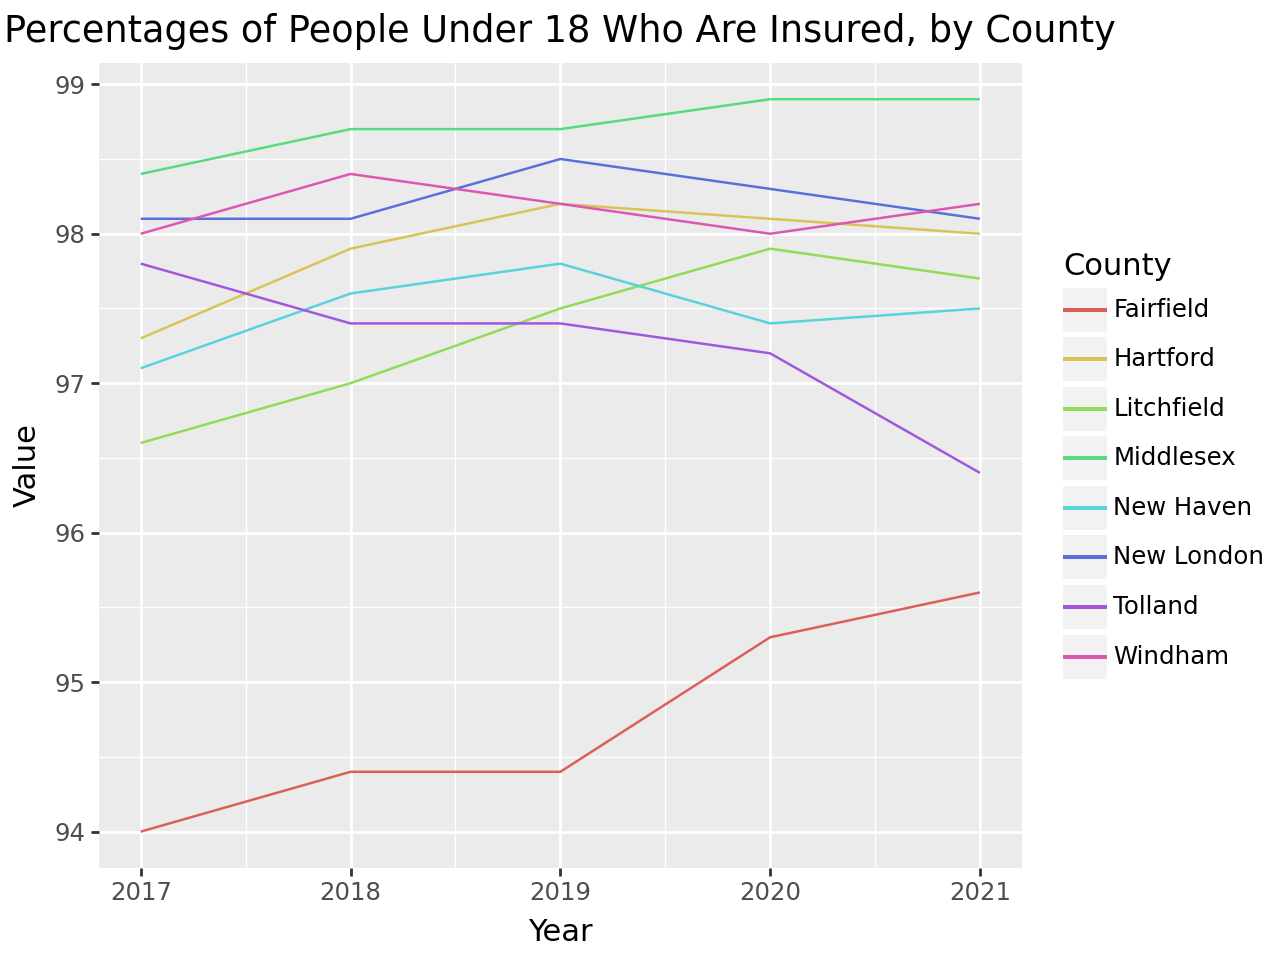

In [225]:
# create line plot
(
    ggplot(insurance_df_under18_with_coverage, aes(x='Year', y='Percent Insured', color='County'))
    + geom_line()
    + labs(title='Percentages of People Under 18 Who Are Insured, by County', x='Year', y='Value')
)

In [226]:
# upload total heat pump data -
#url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/WS-MapU.csv" # 2017-2021
#hp_total_df = pd.read_csv(url)  # Try different encoding
#hp_total_df.head()



In [227]:
# Upload Heat Pump Data - use this one 4/26
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/WS%20Map_all.csv"
hp_df = pd.read_csv(url)  # Try different encoding
hp_df.head()
hp_df.value_counts()

Legal Town     Heat Pump Type                    RNC      Sector  Source Program Name  Utility     Year  LEGAL TOWN     Program   Source Program              Project Measure: Measure Total Quantity
West Hartford  Air Source Heat Pump, Ducted      Not RNC  RES     RES HVAC             Eversource  2023  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          243
Stamford       Air Source Heat Pump, Ducted      Not RNC  RES     RES HVAC             Eversource  2023  STAMFORD       Tracksys  Energy Optimization Rebate  1                                          243
West Hartford  Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          224
                                                                                                   2022  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          221
Guilford       Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  GUILFORD       Tracksys  Energy Optimization Rebate  1                                          207
                                                                                                                                                                                                        ... 
Ansonia        Air Source Heat Pump, Mini Split  Not RNC  C&I     ECB                  UI          2023  ANSONIA        EXP       EXP                         2                                            1
                                                                                                                                                              3                                            1
                                                                                                                        MID       MID                         1                                            1
Woodbury       Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  WOODBURY       Tracksys  Energy Optimization Rebate  2                                            1
Ansonia        Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             UI          2020  ANSONIA        CTDSHP    CTDSHP                      1                                            1
Name: count, Length: 2810, dtype: int64

# Understanding Heat Pump Data

In [228]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54814 entries, 0 to 54813
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Legal Town                               54814 non-null  object
 1   Heat Pump Type                           54814 non-null  object
 2   RNC                                      54814 non-null  object
 3   Sector                                   54814 non-null  object
 4   Source Program Name                      41362 non-null  object
 5   Utility                                  54814 non-null  object
 6   Year                                     54814 non-null  int64 
 7   LEGAL TOWN                               54814 non-null  object
 8   Program                                  54814 non-null  object
 9   Source Program                           41362 non-null  object
 10  Project Measure: Measure Total Quantity  54814 non-null  i

In [229]:
hp_df.shape

(54814, 11)

In [230]:
hp_df['Heat Pump Type'].value_counts()

,count
Heat Pump Type,
"Air Source Heat Pump, Mini Split",40567
"Air Source Heat Pump, Ducted",13354
Ground Source Heat Pump,893


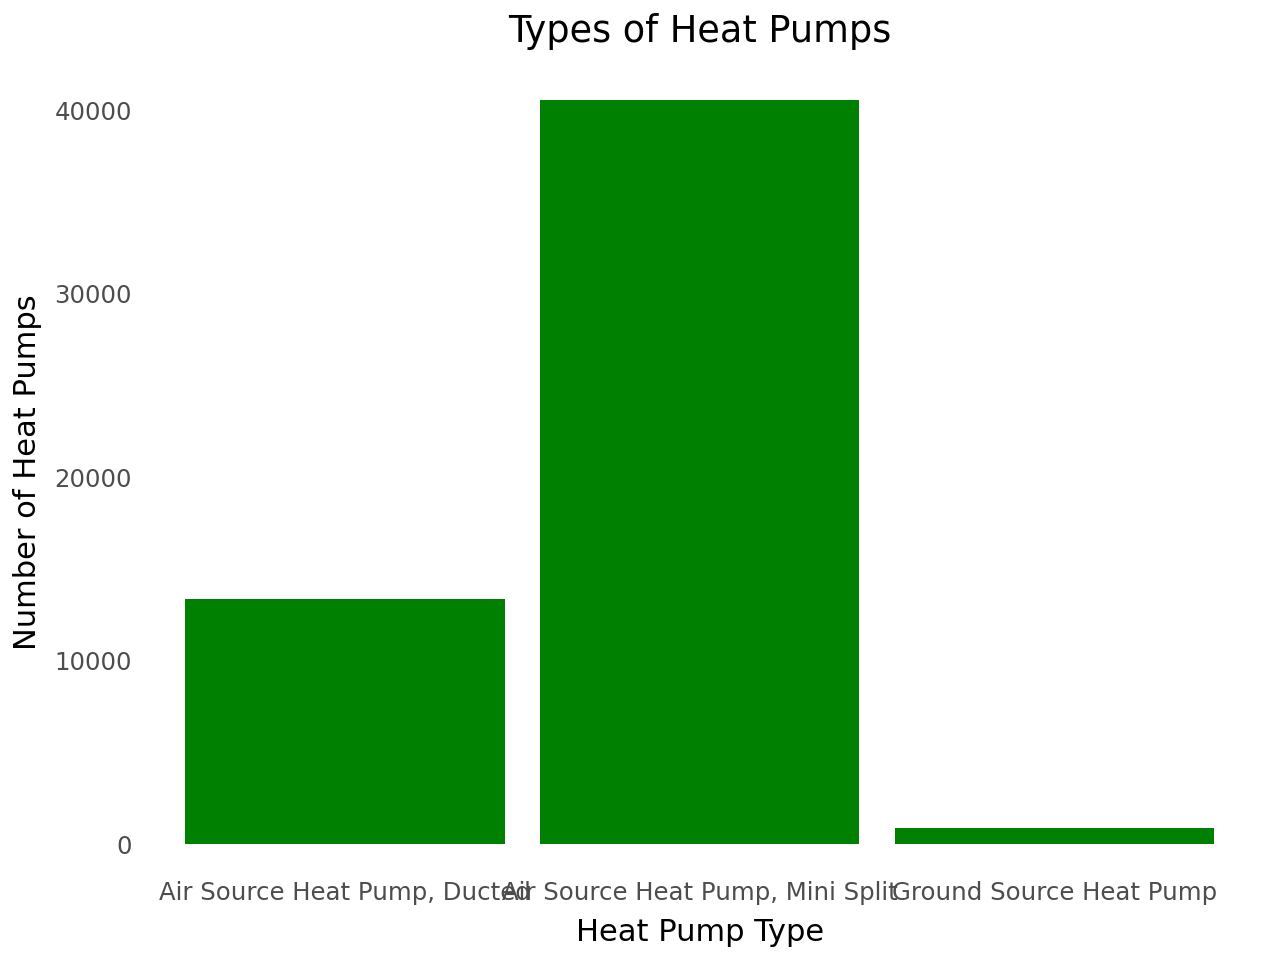

In [231]:
# Plotting by heat pump type
from plotnine import ggplot, aes, geom_bar, labs

plot = (
    ggplot(hp_df, aes(x='Heat Pump Type')) +
    geom_bar(fill="green") +   # <-- set the fill color directly here
    labs(title='Types of Heat Pumps', x='Heat Pump Type', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot


In [232]:
# Legal town is all capitizaled so need to change it to lower case
#hp_df[""]
hp_df.Year.value_counts()

,count
Year,
2023,18920
2022,11342
2021,9677
2020,5163
2019,4366
2018,3108
2017,2238


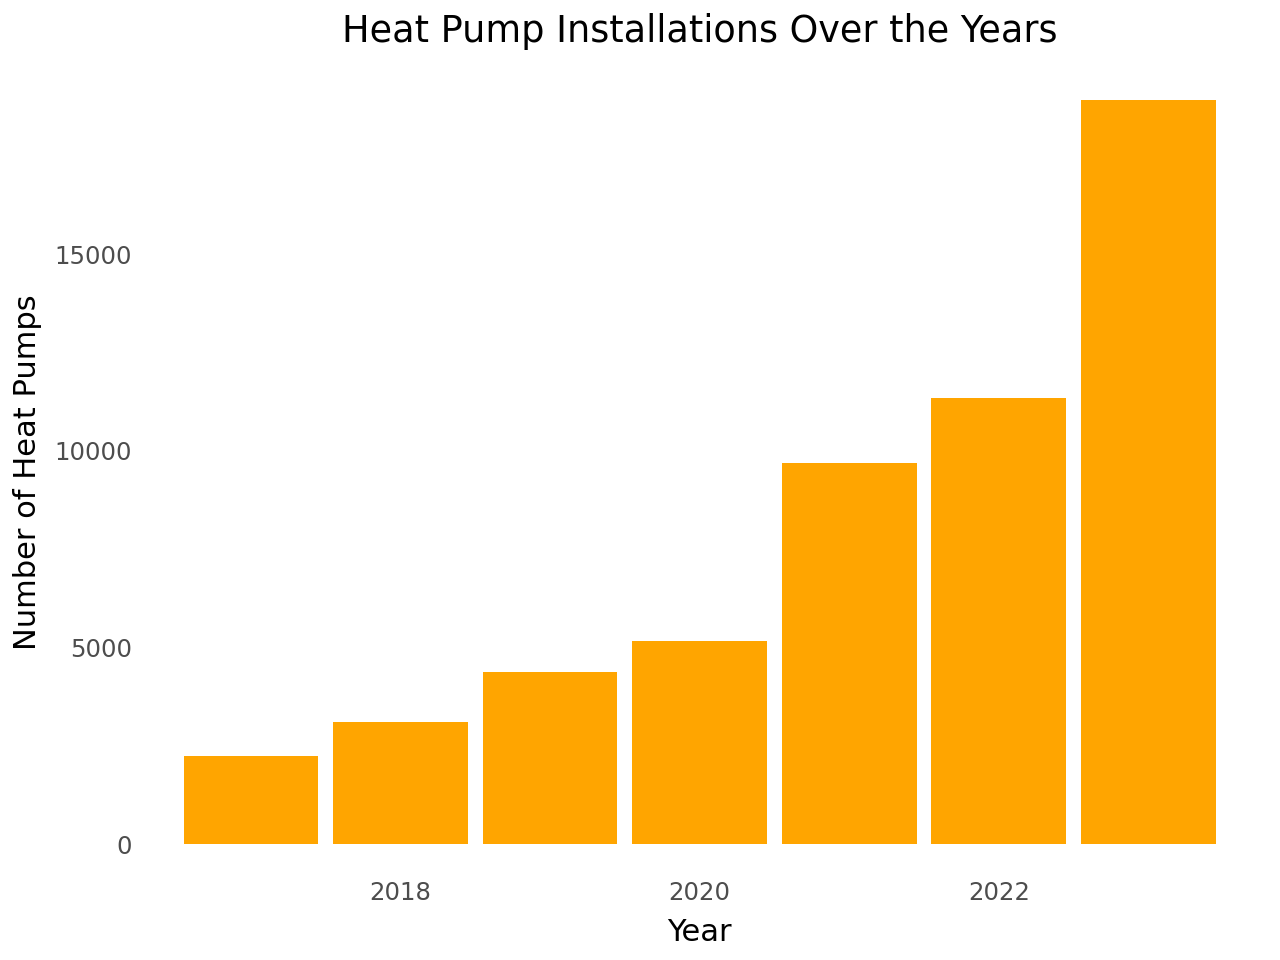

In [233]:
# Plotting by Years
plot = (
    ggplot(hp_df, aes(x='Year')) +
    geom_bar(fill="orange") +
    labs(title='Heat Pump Installations Over the Years', x='Year', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

In [234]:
hp_df.Utility.value_counts()

,count
Utility,
Eversource,48378
UI,6436


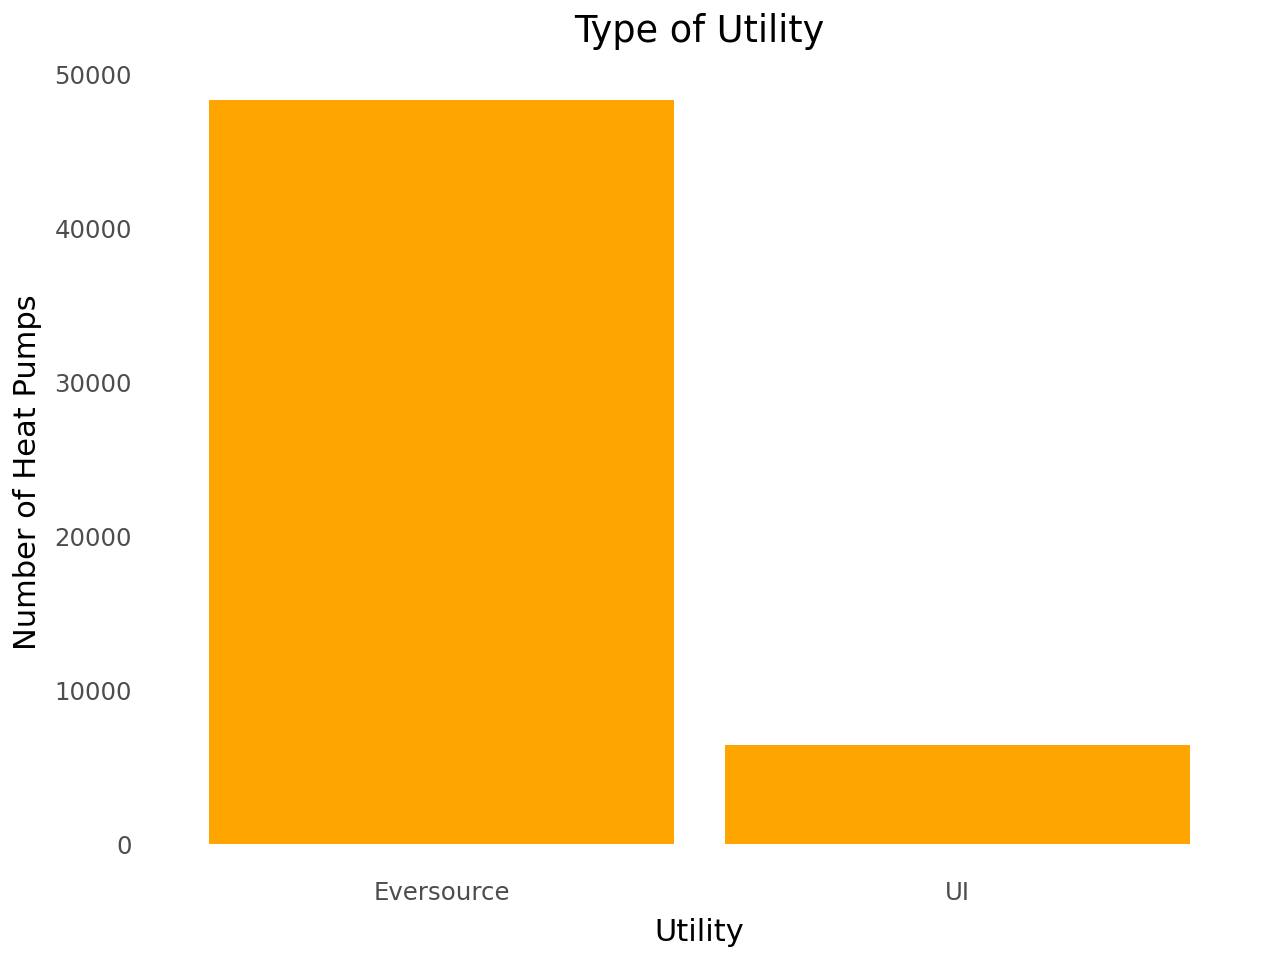

In [235]:
# Plotting by utility
plot = (
    ggplot(hp_df, aes(x='Utility')) +
    geom_bar(fill="orange") +
    labs(title='Type of Utility', x='Utility', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

In [236]:
# Aggregating the years and heat pump type

# Group by 'Legal Town' and sum the 'Project Measure: Measure Total Quantity'
combined_hp = hp_df.groupby('Legal Town')['Project Measure: Measure Total Quantity'].sum().reset_index()

# Rename the column if you want
combined_hp = combined_hp.rename(columns={'Project Measure: Measure Total Quantity': 'Total Heat Pumps'})
combined_hp = combined_hp.rename(columns={'Legal Town': 'TOWN'})


# View result
combined_hp.head()


,TOWN,Total Heat Pumps
0,Andover,95
1,Ansonia,115
2,Ashford,192
3,Avon,445
4,Barkhamsted,103


In [237]:
# Group by Legal Town and aggregate Utility into a combined string
combined_utilities = hp_df.groupby('Legal Town')['Utility'].unique().reset_index()
combined_utilities['Utility'] = combined_utilities['Utility'].apply(lambda x: ', '.join(x))

print(combined_utilities)
combined_utilities

        Legal Town     Utility
0          Andover  Eversource
1          Ansonia          UI
2          Ashford  Eversource
3             Avon  Eversource
4      Barkhamsted  Eversource
..             ...         ...
161  Windsor Locks  Eversource
162        Wolcott  Eversource
163     Woodbridge          UI
164       Woodbury  Eversource
165      Woodstock  Eversource

[166 rows x 2 columns]


,Legal Town,Utility
0,Andover,Eversource
1,Ansonia,UI
2,Ashford,Eversource
3,Avon,Eversource
4,Barkhamsted,Eversource
...,...,...
161,Windsor Locks,Eversource
162,Wolcott,Eversource
163,Woodbridge,UI
164,Woodbury,Eversource


In [ ]:
# Uploading Demographic Data - Kei - you can work on this such as plot bar plots or whatever you think is neccessary
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CT_demo.csv"
demo_df = pd.read_csv(url)
demo_df.head()

# Joining both Demographic Data and Heat Pump Data

In [238]:
df = pd.merge(combined_hp, demo_df, on='TOWN', how='left')
df

,TOWN,Total Heat Pumps,Median Age,Median Home Value,Unemployment Rate,Per Income Capita,Tenure_Owner_Occupied(%),Tenure_Renter_Occupied(%),Housing Units,TOWN_NO,...,60_to_64_Years,18_to_24_Years,65_and_Over_Years,Total_Households,Median_Household_Income,SNAP_Recipients,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.
0,Andover,95,47.9,297400,4.7,44803,88.40,11.60,1275.0,1.0,...,9.6,9.5,17.7,1216.0,99449.0,2.88,1.4,7.9,5.1,74.6
1,Ansonia,115,42.4,217800,9.6,30285,59.42,40.58,8867.0,2.0,...,8.4,6.5,18.4,7806.0,53709.0,15.60,48.6,1.5,7.9,40.6
2,Ashford,192,37.8,271700,4.9,46602,73.68,26.32,2033.0,3.0,...,7.4,7.0,14.2,1774.0,84909.0,8.23,1.1,2.7,16.6,62.6
3,Avon,445,45.2,371900,4.1,74617,83.27,16.73,8042.0,4.0,...,7.6,5.0,20.9,6977.0,123077.0,2.85,43.1,4.5,8.8,42.5
4,Barkhamsted,103,48.3,262900,5.0,43558,92.66,7.34,1473.0,5.0,...,5.9,6.0,24.0,1336.0,103500.0,2.10,0.7,2.8,7.4,80.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Windsor Locks,131,43.3,195200,6.1,40361,78.97,21.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Wolcott,266,46.6,248100,5.3,42098,84.86,15.14,6423.0,166.0,...,5.7,8.6,18.8,6052.0,96014.0,4.51,7.6,12.7,9.4,67.3
163,Woodbridge,221,47.1,472400,3.9,70114,88.09,11.91,3399.0,167.0,...,8.7,2.3,20.5,2897.0,169155.0,1.69,10.1,2.5,6.1,79.9
164,Woodbury,256,54.5,383100,5.1,61650,77.77,22.23,4945.0,168.0,...,11.7,5.2,29.7,4129.0,100850.0,2.54,2.4,5.2,22.6,65.8


/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 27 rows containing missing values.


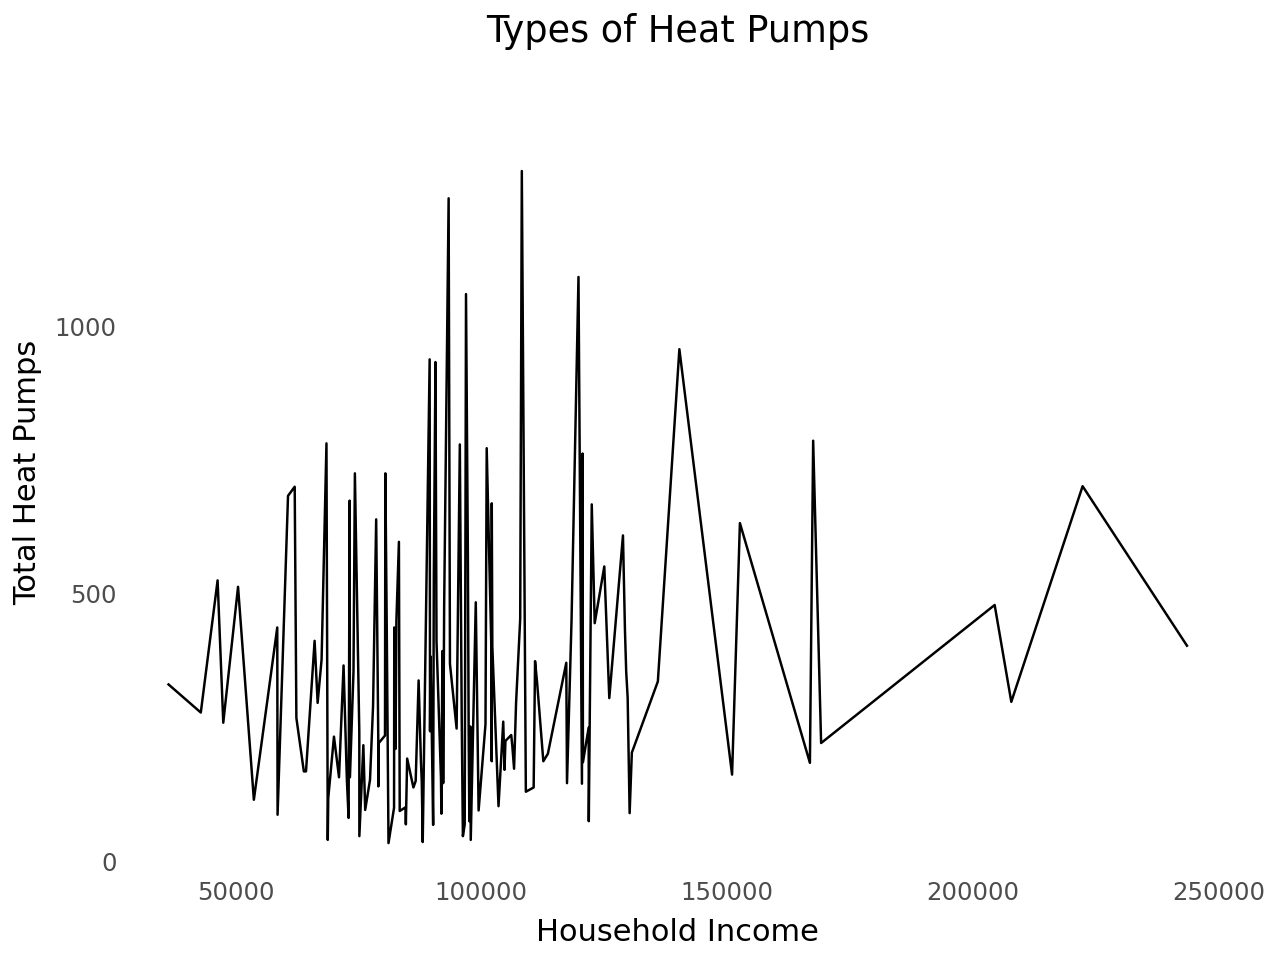

In [239]:
(
    ggplot(df, aes(x='Median_Household_Income', y='Total Heat Pumps')) +
    geom_line() +
    theme_minimal()+
    labs(title='Types of Heat Pumps', x='Household Income', y='Total Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 27 rows containing missing values.
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


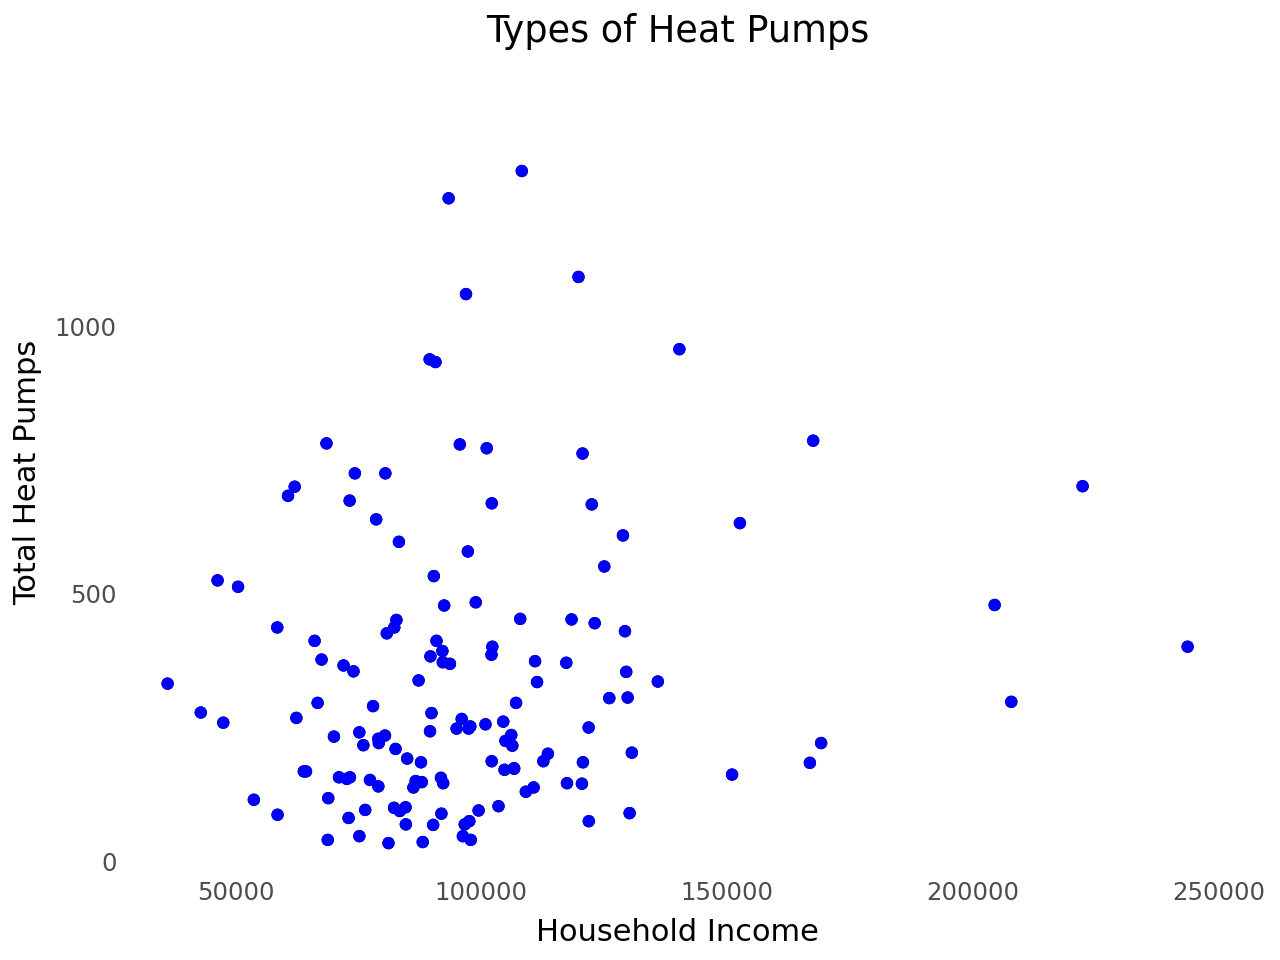

In [240]:
(
    ggplot(df, aes(x='Median_Household_Income', y='Total Heat Pumps')) +
    geom_point() +
    theme_minimal() +
    geom_point(color="blue") +
    labs(title='Types of Heat Pumps', x='Household Income', y='Total Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)


## Uploading Spatial Data - CT Shapefile

In [241]:
# THis works
!wget -O tl_2020_09_place20.zip "https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_09_place.zip"


--2025-04-26 16:29:05--  https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_09_place.zip
Resolving www2.census.gov (www2.census.gov)... 172.65.90.25, 172.65.90.27, 172.65.90.24, ...
Connecting to www2.census.gov (www2.census.gov)|172.65.90.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867378 (847K) [application/zip]
Saving to: ‘tl_2020_09_place20.zip’

tl_2020_09_place20. 100%[===================>] 847.05K  1.96MB/s    in 0.4s    

2025-04-26 16:29:06 (1.96 MB/s) - ‘tl_2020_09_place20.zip’ saved [867378/867378]



In [242]:
#!head tl_2020_09_place20.zip


In [ ]:
# This works
# 2. Unzip it
!unzip tl_2020_09_place20.zip

Archive:  tl_2020_09_place20.zip
replace tl_2020_09_place.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

shape = 'tl_2020_09_place.shp'
df_CT = gpd.read_file(shape)
df_CT.head()

In [ ]:
df_CT.info()

In [ ]:
df_CT.shape

In [ ]:
df_CT = df_CT.rename(columns={'NAME': 'TOWN'})



In [ ]:
df = pd.merge(df, df_CT, on='TOWN', how='left')
df
# Left tyring to join the spatial data with the heat pump/demographic data - 4/26 - 12:33 pm

# EXTRA - Trying to aggregate into county level but not sure if it is necessary

In [ ]:
hp_df["County"]= "County"
hp_df["County"]

In [ ]:
fairfield_towns = [
  "Bethel", "Bridgeport", "Brookfield", "Danbury", "Darien",
  "Easton", "Fairfield", "Greenwich", "Monroe", "New Canaan",
  "Newtown", "Norwalk"	, "Redding"	, "Ridgefield",
"Shelton", 	"Sherman", 	"Stamford",	"Stratford"	, "Trumbull",
"Weston",	"Westport",	"Wilton" ]


# Assuming you already have a DataFrame called hp_df
# Update 'County' to 'Fairfield' where 'Legal Town' is in the list
hp_df.loc[hp_df["Legal Town"].isin(fairfield_towns), "County"] = "Fairfield"


In [ ]:
hartford_towns = [
  "Avon",	"Berlin",	"Bloomfield",	"Bristol"	, "Burlington",
"Canton", 	"East Granby"	, "East Hartford", 	"East Windsor"	, "Enfield",
"Farmington", "Glastonbury",	"Granby",	"Hartford",	"Hartland",
"Manchester",	"Marlborough", 	"New Britain",	"Newington", 	"Plainville",
"Rocky Hill",	"Simsbury", "Southington",	"South Windsor"	, "Suffield",
"West Hartford", 	"Wethersfield",	"Windsor",	"Windsor Locks" ]


# Assuming you already have a DataFrame called hp_df
# Update 'County' to 'Fairfield' where 'Legal Town' is in the list
hp_df.loc[hp_df["Legal Town"].isin(hartford_towns), "County"] = "Hartford"

In [ ]:
Litchfield_towns = [
  "Barkhamsted",	"Bethlehem",	"Bridgewater",	"Canaan", 	"Colebrook",
"Cornwall",	"Goshen",	"Harwinton",	"Kent",	"Litchfield",
"Morris",	"New Hartford",	"New Milford",	"Norfolk",	"North Canaan",
"Plymouth",	"Roxbury",	"Salisbury",	"Sharon", "Thomaston",
"Torrington",	"Warren",	"Washington",	"Watertown", "Winchester",
"Woodbury"  ]


# Assuming you already have a DataFrame called hp_df
# Update 'County' to 'Fairfield' where 'Legal Town' is in the list
hp_df.loc[hp_df["Legal Town"].isin(Litchfield_towns), "County"] = "Litchfield"

In [ ]:
Litchfield County
Barkhamsted	Bethlehem	Bridgewater	Canaan	Colebrook
Cornwall	Goshen	Harwinton	Kent	Litchfield
Morris	New Hartford	New Milford	Norfolk	North Canaan
Plymouth	Roxbury	Salisbury	Sharon	Thomaston
Torrington	Warren	Washington	Watertown	Winchester
Woodbury

In [ ]:
hp_df["County"]

In [ ]:
hp_df["County"] = ["Fairfield"] = hp_df["Legal Town"] = ["Bethel",	"Bridgeport",	"Brookfield",	"Danbury",	"Darien",
"Easton"	,"Fairfield",	"Greenwich",	"Monroe",	"New Canaan"]

In [ ]:
Fairfield_County = ["Bethel",	"Bridgeport"	"Brookfield"	"Danbury"	"Darien",
"Easton"	"Fairfield"	"Greenwich"	"Monroe"	"New Canaan"
"New Fairfield"]	Newtown	Norwalk	Redding	Ridgefield
Shelton	Sherman	Stamford	Stratford	Trumbull
Weston	Westport	Wilton"]
Bethel	Bridgeport	Brookfield	Danbury	Darien
Easton	Fairfield	Greenwich	Monroe	New Canaan
New Fairfield	Newtown	Norwalk	Redding	Ridgefield
Shelton	Sherman	Stamford	Stratford	Trumbull
Weston	Westport	Wilton

In [ ]:
# upload insurance data
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CTj.csv"
demo_df = pd.read_csv(url)
demo_df.head()

In [ ]:
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CTj.csv"

In [ ]:
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CT_demo.csv"
demo_df = pd.read_csv(url)
demo_df.head()

In [ ]:
combined_hp

In [ ]:
(
    geom_point(color="blue")
     labs(title='Types of Heat Pumps', x='Heat Pump Type', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)